#### Jupyter notebook to integrate a black body function to find the number of ionizing photons. 

Importing relevant packages and setting constants (in cgs units)

In [38]:
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

k=1.3806e-16 #Boltzmann constant cgs (erg/K)
c=3e10 #speed of light cgs (cm/s)
h=6.626e-27 #Planck constant cgs (erg.s)


Setting up a blackbody function as a function of wavelength, same as the IDL function PLANCK(); then running a test to see that it is producing the correct shape. 

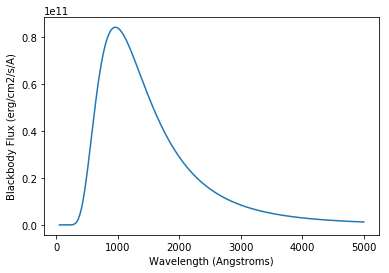

In [39]:
kT = 4.1418e-12 #T=30000 K
#kT = 0.1

def planck(wave):
    w = wave/10**8.0
    c1 = 2.0*numpy.pi*h*c*c
    c2 = h*c
    val = c2/(w*kT)
    bbflux = c1 / (w**5.0 * (numpy.exp(val - 1.0)))
    return bbflux*(10**-8.0) #ergs/cm2/s/A


wave = numpy.arange(50,5000)
wave = numpy.array(wave)
bbflux = planck(wave)
                   
plt.plot(wave,bbflux)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Blackbody Flux (erg/cm2/s/A)')
plt.show()


1. Testing the built in integration function, which returns the integral and the absolute error in the result.
2. Syntax: integrate.quad(function, lower limit, upper limit)
3. Results in units of erg/cm2/s

In [40]:
print(integrate.quad(planck,1000,1100))

(8246848880624.495, 0.09155841507873513)


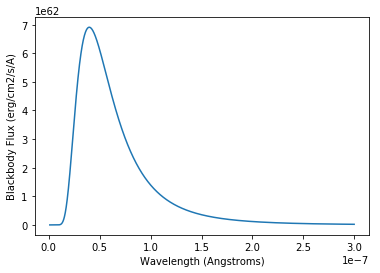

(3.8954573217086896e+55, 1.4515599768799814e+47)


In [41]:
kT = 0.1
wave = numpy.arange(1e-9,3e-7,1e-10)
wave = numpy.array(wave)
bbflux = planck(wave)

plt.plot(wave,bbflux)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Blackbody Flux (erg/cm2/s/A)')
plt.show()

print(integrate.quad(planck,1e-9,3e-7))

This gives the wrong answer, due to errors from subtracting very small numbers. Move to bbflux as a function of frequency instead

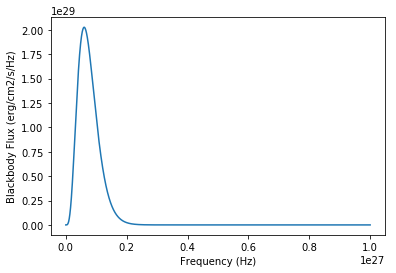

(1.1617789496061549e+48, 8.877211655631523e+38)
(1.5656287504449526e+55, 4.705812842264911e+44)
(1.5656287504449526e+55, 4.705809052303588e+44)


In [44]:
#kT = 1.3806e-16*3000
kT=0.1

def planck_nu(freq):
    c1 = 2.0*numpy.pi*h*(freq**3.0)
    c2 = h*c
    val = h*freq/kT
    bbflux = c1 / (c**2.0 * (numpy.exp(val - 1.0)))
    #return bbflux #ergs/cm2/s/Hz
    return bbflux*h*freq  #photons/cm2/s/Hz

freq = numpy.arange(1e21,1e27,1e21)
freq = numpy.array(freq)
bbflux = planck_nu(freq)
                   
plt.plot(freq,bbflux)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Blackbody Flux (erg/cm2/s/Hz)')
plt.show()


print(integrate.quad(planck_nu,0.4e27,1e27)) #test
print(integrate.quad(planck_nu,5.95e15,1e27)) #5.95e15 Hz = 24.6 eV
print(integrate.quad(planck_nu,1.315e16,1e27)) #1.315e16 Hz = 54.5 eV